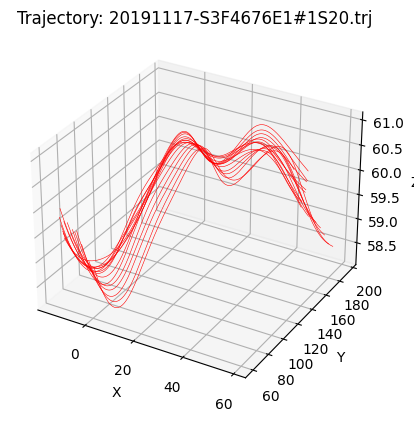

In [1]:
# Import other necessary modules here
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Define the read_trj_data function here
from trj_data_utils import read_trj_data

# Set the filename
filename = "20191117-S3F4676E1#1S20.trj"

# Read the trajectory data
data = read_trj_data(filename)

# Create the 3D plot
ax = plt.axes(projection='3d')
ax.view_init(elev=30, azim=-60)

# Plot the trajectories
for trj in data:
    if len(trj) < 10:
        continue
    X = []
    Y = []
    Z = []
    for x in trj:
        X.append(x[2])
        Y.append(x[3])
        Z.append(x[4])
    ax.plot3D(X, Y, Z, 'red', linewidth=0.4)

# Set the plot title and labels
ax.set_title('Trajectory: ' + filename)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the plot
plt.grid(True)
plt.show()


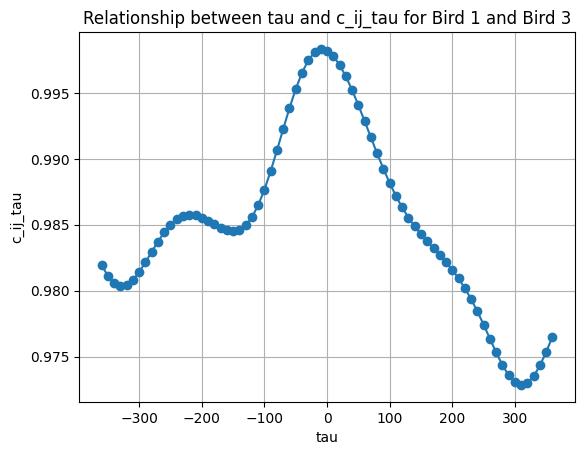

In [3]:
from correlation_delay import calculate_correlation_pairs_multiple_tau, calculate_directional_correlation_delay

bird_i = 2  # Index of bird i
bird_j = 3  # Index of bird j
tau_values = list(range(-60*6, 60*6+1, 10))  # List of tau values from -60*6 to 60*6 with interval of 10

# calculate_directional_correlation_delay(data, bird_i, bird_j, 0)

c_ij_values = calculate_correlation_pairs_multiple_tau(data, bird_i, bird_j, tau_values)[bird_i, bird_j]

plt.plot(tau_values, c_ij_values, marker='o')
plt.xlabel('tau')
plt.ylabel('c_ij_tau')
plt.title(f'Relationship between tau and c_ij_tau for Bird {bird_i} and Bird {bird_j}')
plt.grid(True)
plt.show()
